<a href="https://colab.research.google.com/github/iamatul1214/Machine-learning-/blob/main/gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Data preparation

In [2]:
## Loading the data
data = load_boston()
x = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target)

In [3]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

## Spliting the dataset into training and testing

In [5]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.3)

In [6]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.17134,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76
330,0.04544,0.0,3.24,0.0,0.460,6.144,32.2,5.8736,4.0,430.0,16.9,368.57,9.09
294,0.08199,0.0,13.92,0.0,0.437,6.009,42.3,5.5027,4.0,289.0,16.0,396.90,10.40
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25


## Model training and Evaluation

In [7]:
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(x_train,y_train)
y_pred = gradient_reg.predict(x_test)
r2_score = r2_score(y_test,y_pred)
r2_score

0.8919752506317935

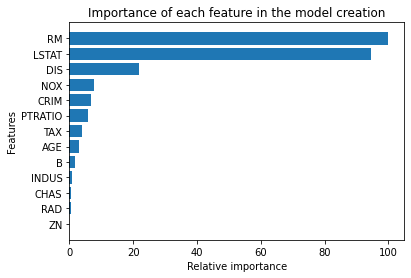

In [8]:
## We have options of observing those features which are contributing most to the model, so that least contributing one can be ignored as well.
imp_features = gradient_reg.feature_importances_
imp_features = 100.0 * (imp_features/imp_features.max())
sorted_idx = np.argsort(imp_features)
pos = np.arange(sorted_idx.shape[0]) + .5
pos
plt.barh(pos, imp_features[sorted_idx], align='center')
plt.yticks(pos,data.feature_names[sorted_idx])
plt.xlabel("Relative importance")
plt.ylabel("Features")
plt.title("Importance of each feature in the model creation")
plt.show()

In [9]:
## Let's create a gradient boosting model uysing our own custom hyperparameter values
grad_boost = GradientBoostingRegressor(n_estimators=10,max_depth=3,learning_rate=0.5)
grad_boost.fit(x_train, y_train)
y_pred = grad_boost.predict(x_test)
# accuracy = r2_score(y_test,y_pred)
# accuracy
mae = mean_absolute_error(y_test,y_pred)
mae
score = grad_boost.score(x_test, y_test)
score

0.8706597782297849

### We saw in above cell that due to some custom uses of hyperparameter values we could achieve slight more accuracy, Now let's try to implement gridsearchCV to find the best hyperparameters

In [10]:
params = {'n_estimators':[5,10,20,30,50,100,200,500], 'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15,20], 'learning_rate':[0.01,0.05,0.10,0.20,0.5,0.75,1]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=params, scoring='r2')
grid.fit(x_train,y_train)
grid.best_params_, grid.best_score_

({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50},
 0.8848996199180789)

In [12]:
## Let's create a gradient boosting model uysing our own custom hyperparameter values
grad_boost = GradientBoostingRegressor(n_estimators=50,max_depth=5,learning_rate=0.1)
grad_boost.fit(x_train, y_train)
y_pred = grad_boost.predict(x_test)
# accuracy = r2_score(y_test,y_pred)
# accuracy
mae = mean_absolute_error(y_test,y_pred)
mae
score = grad_boost.score(x_test, y_test)
score

0.8531888853634546